# Interconnection Queues

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

## NYISO Interconnection Queue

The `get_interconnection_queue` call returns projects that are "active", "completed", and "withdrawn"

In [2]:
iso = gridstatus.NYISO()
queue = iso.get_interconnection_queue()
queue.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),...,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync Date,Last Updated Date,Z,S,Availability of Studies,SGIA Tender Date
0,0276,Homer Solar Energy Center,NaN,Cortland,NY,NaN,NM-NG,Solar,90.0,90.0,...,NaN,NaN,NaN,NaT,2023-09-01,9/30/2022,C,10.0,"FES, SRIS, FS",NaN
1,0393,Berrians East Replacement,NaN,Queens,NY,NaN,CONED,Dual Fuel,94.2,94.2,...,NaN,NaN,NaN,NaT,2024-08-01,6/30/2022,J,11.0,"FES, SRIS, FS",NaN
2,0396,Baron Winds,NaN,Steuben,NY,NaN,NYSEG,Wind,238.4,238.4,...,NaN,NaN,NaN,NaT,2022-11-29,12/31/2022,C,13.0,"FES, SRIS, FS",NaN
3,0396A,Wood Street Transformer,NaN,Putnam,NY,NaN,NYSEG,AC Transmission,0.0,NaN,...,NaN,NaN,NaN,NaT,NaT,4/30/2021,G,12.0,SIS,NaN
4,0422,Eight Point Wind Energy Center,NaN,Steuben-Allegany,NY,NaN,NYSEG,Wind,101.8,101.8,...,NaN,NaN,NaN,NaT,2022-11-01,3/31/2021,C,12.0,"FES, SRIS, FS",NaN


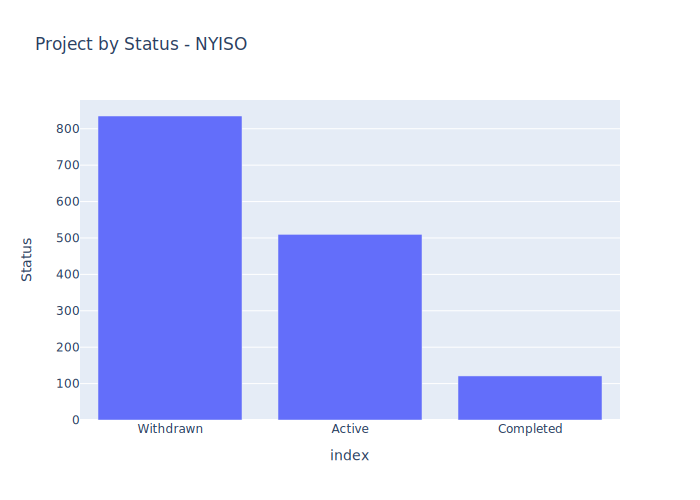

In [3]:
status_distributions = queue["Status"].value_counts()
fig = px.bar(
    status_distributions,
    x=status_distributions.index,
    y="Status",
    title="Project by Status - NYISO",
)
fig.show("svg")

## Days in Queue

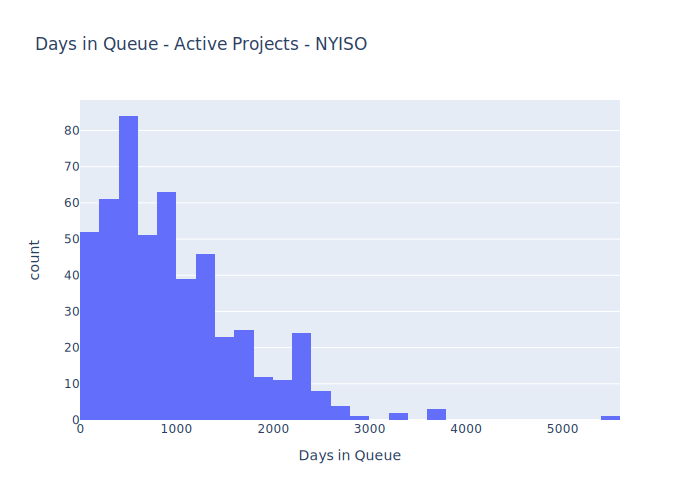

In [4]:
queue["Days in Queue"] = (pd.Timestamp.now() - queue["Queue Date"]).dt.days
active = queue[queue["Status"] == "Active"]
fig = px.histogram(
    active, x="Days in Queue", title="Days in Queue - Active Projects - NYISO"
)
fig.show("svg")

## Top Active Project Types

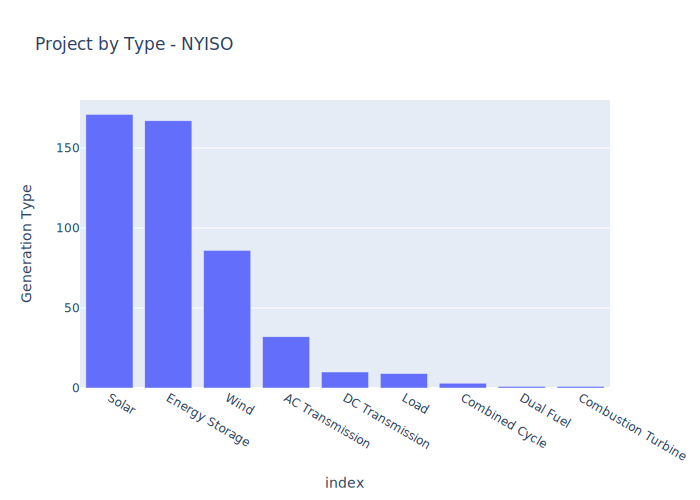

In [5]:
generation_types = active["Generation Type"].value_counts()
fig = px.bar(
    generation_types,
    x=generation_types.index,
    y="Generation Type",
    title="Project by Type - NYISO",
)
fig.show("svg")

## Proposed Completion Date

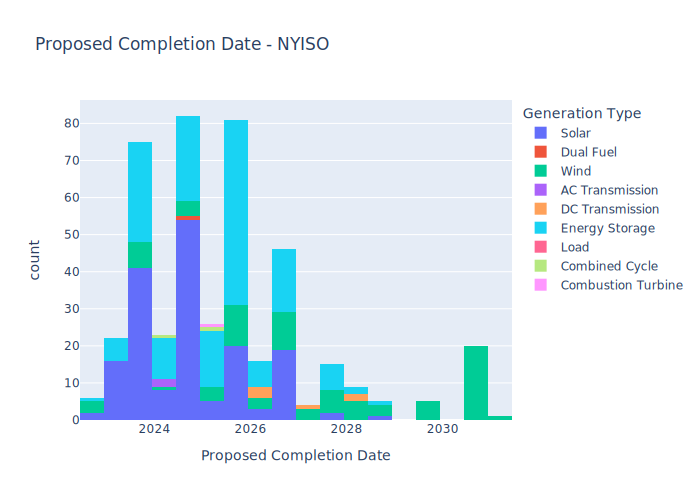

In [6]:
fig = px.histogram(
    active,
    x="Proposed Completion Date",
    title="Proposed Completion Date - NYISO",
    color="Generation Type",
)
fig.show("svg")

## Get Interconnection Queue Data from All ISOs

In [7]:
all_queues = gridstatus.get_interconnection_queues()
all_queues

100%|██████████| 7/7 [00:22<00:00,  3.27s/it]


,ISO,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date
0,Midcontinent ISO,E002,None,None,Pointe Coupee,LA,500 kV switchyard at Big Cajon II,Entergy,Gas,15.000000,15.0,15.0,2013-09-13T04:00:00Z,Done,None,None,None,None
1,Midcontinent ISO,E291,None,None,,TX,Rich 138 kV substation,Entergy,Hydro,27.000000,27.0,27.0,2012-05-15T04:00:00Z,Done,2016-01-31T05:00:00Z,None,None,None
2,Midcontinent ISO,G001,None,None,Brown County,WI,Unknown,American Transmission Co. LLC,,255.000000,255.0,255.0,1995-11-08T05:00:00Z,Withdrawn,2014-11-17T05:00:00Z,None,None,None
3,Midcontinent ISO,G002,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.000000,174.0,174.0,1998-12-01T05:00:00Z,Done,2016-01-01T05:00:00Z,None,None,None
4,Midcontinent ISO,G003,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.000000,174.0,174.0,1998-12-01T05:00:00Z,Done,2004-01-01T05:00:00Z,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19870,ISO New England,1308,Uxbridge Substation – NG Hopedale West Group S...,None,Worcester,MA,"NG Feeder 321W6, Uxbridge T2",NaN,BAT,6.994000,6.994,6.994,2022-09-09 00:00:00,Withdrawn,2024-11-15 00:00:00,NaT,None,None
19871,ISO New England,1310,Battery Storage,None,Berkshire,MA,115 kV Transmission line (1211 - Present betwe...,NaN,BAT,118.750000,118.75,118.75,2022-09-22 00:00:00,Withdrawn,2025-09-30 00:00:00,NaT,None,None
19872,ISO New England,1314,Offshore Wind,None,NaN,MA,"Eversource 115kV Acushnet, lines 112/114",NaN,WND,470.000000,470.0,470.0,2022-09-26 00:00:00,Withdrawn,2029-09-01 00:00:00,NaT,None,None
19873,ISO New England,1315,Battery Storage,None,Windham,CT,"Eversource Killingly Substation,115kV BUS, Tra...",NaN,BAT,106.970001,106.970001,106.970001,2022-09-28 00:00:00,Withdrawn,2026-06-09 00:00:00,NaT,None,None


In [8]:
all_queues["Status"].value_counts()

Withdrawn                                    7464
Active                                       6624
WITHDRAWN                                    1606
In Service                                   1031
Done                                          763
Completed                                     758
ACTIVE                                        470
Engineering and Procurement                   322
Confirmed                                     223
COMPLETED                                     199
Retracted                                     131
Suspended                                      78
Deactivated                                    57
Partially in Service - Under Construction      55
Under Construction                             53
Annulled                                       24
Withdrawn - Pending Cure                        2
                                                1
Name: Status, dtype: int64